In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, confusion_matrix

In [14]:
source_path = '/content/drive/My Drive/Pattern Recognition/project/'
os.chdir(source_path)
os.listdir()

['pb_train', 'pb_test', 'yt_test', 'abc2.csv']

In [15]:
pb_train_path = source_path + 'pb_train/'
pb_test_path = source_path + 'pb_test/'
yt_test_path = source_path + 'yt_test/'
# Get all the training/test csv file names
language_file_names = [f for f in os.listdir(pb_train_path) if f.endswith('.csv')]

In [18]:
print(language_file_names)

['odi_combined.csv', 'kan_combined.csv', 'mar_combined.csv', 'hin_combined.csv', 'asm_combined.csv', 'mal_combined.csv', 'pun_combined.csv', 'tam_combined.csv', 'tel_combined.csv', 'eng_combined.csv', 'ben_combined.csv', 'guj_combined.csv']


In [17]:
languages = [f[:3] for f in language_file_names]
print(languages)

['odi', 'kan', 'mar', 'hin', 'asm', 'mal', 'pun', 'tam', 'tel', 'eng', 'ben', 'guj']


In [19]:
os.chdir(pb_train_path)
train_df_list = [pd.read_csv(f,header=None,encoding='UTF-16') for f in language_file_names] # list of dataframes of each language
os.chdir(source_path)

In [20]:
total_len = 0
for df in train_df_list:
    total_len += len(df)
print(total_len)

1036801


In [21]:
## Making list pb_test dataframes after reading from csv
# The labels to these dataframes will be in the order they appear in language_file_names

In [22]:
os.chdir(pb_test_path)
pb_test_df_list = [pd.read_csv(f,header=None,encoding='UTF-16') for f in language_file_names] # list of dataframes of each language
os.chdir(source_path)

In [23]:
os.chdir(yt_test_path)
yt_test_df_list = [pd.read_csv(f,header=None,encoding='UTF-16') for f in language_file_names] # list of dataframes of each language
os.chdir(source_path)

In [24]:
total_samples = 0
for i in range(len(train_df_list)):
    total_samples += len(train_df_list[i])

priors = [len(train_df_list[i])/total_samples for i in range(len(train_df_list))]
log_priors = [np.log(prob) for prob in priors]

In [25]:
# y_true contains the correct label for all the tuples in the original combined test dataset
# pb_test



In [26]:
def GMM_prediction(q,test_df_list,cov_type):
    '''This Function takes $q$-> number of cluster and $test_df_list$ :-> list of test data frames as input'''
    # Model Buiding
    gmm_lists = [GaussianMixture(n_components=q, covariance_type=cov_type,random_state=42,init_params='k-means++').fit(train_df_list[i].values) for i in range(len(train_df_list))]
    
    y_test = [] # true labels
    for i in range(len(test_df_list)):
        for x in range(len(test_df_list[i])):
            y_test.append(i)
    #
    
    ## Before calculating log probabilities we need to combine all the data_frames on top of each other in one csv file
    #     concatenating df1 and df2 along rows
    #     vertical_concat = pd.concat([df1, df2], axis=0)
    test = pd.concat(test_df_list, axis=0)
    
    ## weightage log likelihood using gmm.score_samples(x)
    log_lists = [gmm.score_samples(test.values) for gmm in gmm_lists]
    
    ## Now predicting output based on build model
    y_pred = [] #predicted labels based on our model
    for i in range(len(test)):
        # we need to find argmax such that log probability is maximum
        index_of_log_max = 0
        for j in range(len(log_lists)):
            if(log_lists[j][i] + log_priors[j] > log_lists[index_of_log_max][i] + log_priors[index_of_log_max]):
                index_of_log_max = j
        y_pred.append(index_of_log_max)
    
    return y_test, y_pred
    

In [28]:
# calculating accuracy using diag covariance matrix
prediction_accuracy_pb_test = []
calculation_time = []
no_of_clusters = [2,3,4,5,7,10,12,17]
for q in no_of_clusters:
    start = time.perf_counter()
    test_label, pred_label = GMM_prediction(q,pb_test_df_list,'diag')
    acc = 100*accuracy_score(test_label, pred_label)
    end = time.perf_counter()
    calculation_time.append(end-start)
    prediction_accuracy_pb_test.append(acc)
    print(f"Accuracy for num_clustor, {q} is {acc}")

Accuracy for num_clustor, 2 is 33.2326452768761
Accuracy for num_clustor, 3 is 34.65377243086525
Accuracy for num_clustor, 4 is 35.81251986630578
Accuracy for num_clustor, 5 is 37.22343694314143


KeyboardInterrupt: ignored

In [ ]:
num_clusters = [25,32,42,64]
for q in num_clusters:
    no_of_clusters.append(q)
    start = time.perf_counter()
    test_label, pred_label = GMM_prediction(q,pb_test_df_list,'diag')
    acc = 100*accuracy_score(test_label, pred_label)
    end = time.perf_counter()
    calculation_time.append(end-start)
    prediction_accuracy_pb_test.append(acc)
    

In [ ]:
prediction_accuracy_pb_test ## Prediction Accuracy for prasar bharti if cov_type = diagonal matrix

[33.2326452768761,
 34.65377243086525,
 35.81251986630578,
 37.22343694314143,
 37.93814234388695,
 39.25543493965459,
 39.34096841618586,
 40.58582725705314,
 41.888864273398895,
 42.789662778489486,
 43.55407006424643,
 45.09598435739123]

In [ ]:
calculation_time

[21.608894264994888,
 25.941884050000226,
 35.55319803200837,
 38.79373764300544,
 46.7950093170075,
 72.22252176600159,
 87.00042982699233,
 131.7664611069922,
 163.28307435900206,
 226.91201217500202,
 253.2882874909992,
 350.89977380400524]

In [ ]:
# calculating accuracy using full covariance matrix
prediction_accuracy_pb_test_f = []
calculation_time_f = []
no_of_clusters = [2,3,4,5,7,10,12,17]
for q in no_of_clusters:
    start = time.perf_counter()
    test_label, pred_label = GMM_prediction(q,pb_test_df_list,'full')
    acc = 100*accuracy_score(test_label, pred_label)
    end = time.perf_counter()
    calculation_time_f.append(end-start)
    prediction_accuracy_pb_test_f.append(acc)
    

In [ ]:
num_clusters = [25,32,42]
for q in num_clusters:
    start = time.perf_counter()
    test_label, pred_label = GMM_prediction(q,pb_test_df_list,'full')
    acc = 100*accuracy_score(test_label, pred_label)
    end = time.perf_counter()
    calculation_time_f.append(end-start)
    prediction_accuracy_pb_test_f.append(acc)
    

In [ ]:
prediction_accuracy_pb_test_f ## Prediction Accuracy for prasar bharti if cov_type = diagonal matrix

[50.008187326019325,
 52.82732447817837,
 53.81943574875504,
 54.81366609194849,
 56.6370317571928,
 58.06239705641549,
 58.68444119091881,
 59.839528410021295,
 61.03661179552876,
 61.65750007224111,
 62.22290717498724]

In [ ]:
calculation_time_f

[88.72513949600398,
 179.38109570500092,
 262.0267129200074,
 279.59058595199895,
 484.8513579760038,
 730.9109867939987,
 910.990193493999,
 1288.4623996220034,
 2379.651517359991,
 3454.560725602001,
 4374.953712629998]

In [ ]:
sum(calculation_time_f)/60

240.56840712585011

In [ ]:
def GMM_model(q,cov_type):
    gmm_lists = [GaussianMixture(n_components=q, covariance_type=cov_type,random_state=42,init_params='kmeans').fit(train_df_list[i].values) for i in range(len(train_df_list))]
    return gmm_lists

In [ ]:
clusters_count_d = [17,42]
cluster_count_f = [5,25]


In [ ]:
## please don't re-run it
gmm_for_diag_cov = []
gmm_for_full_cov = []

In [ ]:
for i in range(2):
    comp_i_gmm = GMM_model(clusters_count_d[i],'diag')
    gmm_for_diag_cov.append(comp_i_gmm)
    print(i)

0
1


In [ ]:
gmm_for_diag_cov

[[GaussianMixture(covariance_type='diag', n_components=17, random_state=42),
  GaussianMixture(covariance_type='diag', n_components=17, random_state=42),
  GaussianMixture(covariance_type='diag', n_components=17, random_state=42),
  GaussianMixture(covariance_type='diag', n_components=17, random_state=42),
  GaussianMixture(covariance_type='diag', n_components=17, random_state=42),
  GaussianMixture(covariance_type='diag', n_components=17, random_state=42),
  GaussianMixture(covariance_type='diag', n_components=17, random_state=42),
  GaussianMixture(covariance_type='diag', n_components=17, random_state=42),
  GaussianMixture(covariance_type='diag', n_components=17, random_state=42),
  GaussianMixture(covariance_type='diag', n_components=17, random_state=42),
  GaussianMixture(covariance_type='diag', n_components=17, random_state=42),
  GaussianMixture(covariance_type='diag', n_components=17, random_state=42)],
 [GaussianMixture(covariance_type='diag', n_components=42, random_state=42)

In [ ]:
for i in range(len(clusters_count_d)):
    print(f'prediction for diagonal cov and q = {clusters_count_d[i]}')
    overall_acc = prediction(pb_test_df_list, gmm_for_diag_cov[i])
    print(overall_acc)

prediction for diagonal cov and q = 17
Accuracy for each language is: 

asm : 34.069%
tam : 48.468%
odi : 51.160%
tel : 26.552%
hin : 26.060%
mar : 36.267%
ben : 55.290%
mal : 39.788%
guj : 52.220%
eng : 38.610%
kan : 40.213%
pun : 38.793%

Overall Accuracy : 40.693
40.69255145975207
prediction for diagonal cov and q = 42
Accuracy for each language is: 

asm : 37.322%
tam : 50.859%
odi : 53.703%
tel : 30.734%
hin : 31.632%
mar : 37.687%
ben : 58.759%
mal : 42.616%
guj : 55.239%
eng : 40.927%
kan : 44.860%
pun : 39.567%

Overall Accuracy : 43.731
43.730531020333466


In [ ]:
for i in range(2):
    comp_j_gmm = GMM_model(clusters_count_d[i],'full')
    gmm_for_full_cov.append(comp_j_gmm)
    print(i)

In [ ]:
gmm_for_full_cov

[[GaussianMixture(n_components=17, random_state=42),
  GaussianMixture(n_components=17, random_state=42),
  GaussianMixture(n_components=17, random_state=42),
  GaussianMixture(n_components=17, random_state=42),
  GaussianMixture(n_components=17, random_state=42),
  GaussianMixture(n_components=17, random_state=42),
  GaussianMixture(n_components=17, random_state=42),
  GaussianMixture(n_components=17, random_state=42),
  GaussianMixture(n_components=17, random_state=42),
  GaussianMixture(n_components=17, random_state=42),
  GaussianMixture(n_components=17, random_state=42),
  GaussianMixture(n_components=17, random_state=42)]]


In [ ]:
print(f'prediction for full cov and q = {clusters_count_d[0]}')
overall_acc = prediction(pb_test_df_list, gmm_for_full_cov[0])

prediction for diagonal cov and q = 17
Accuracy for each language is: 

asm : 57.835%
tam : 61.557%
odi : 67.773%
tel : 51.192%
hin : 53.106%
mar : 53.334%
ben : 76.115%
mal : 59.042%
guj : 73.007%
eng : 60.169%
kan : 61.742%
pun : 45.175%

Overall Accuracy : 59.966


In [ ]:
def get_confusion_matrix(test_df_list, specific_gmm_list):
    y_test = [] # true labels
    for i in range(len(test_df_list)):
        for x in range(len(test_df_list[i])):
            y_test.append(i)
    test = pd.concat(test_df_list, axis=0)
    log_lists = [gmm.score_samples(test.values) for gmm in specific_gmm_list]
    
    ## Now predicting output based on build model
    y_pred = [] #predicted labels based on our model
    for i in range(len(test)):
        # we need to find argmax such that log probability is maximum
        index_of_log_max = 0
        for j in range(len(log_lists)):
            if(log_lists[j][i] + log_priors[j] > log_lists[index_of_log_max][i] + log_priors[index_of_log_max]):
                index_of_log_max = j
        y_pred.append(index_of_log_max)
    cm = confusion_matrix(y_test,y_pred)
    return cm

In [ ]:
cm_for_full_q_17 = get_confusion_matrix(pb_test_df_list, gmm_for_diag_cov[1])

In [ ]:
df = pd.DataFrame(cm_for_full_q_17, index = languages, 
                  columns = languages)


In [ ]:
cm_for_full_q_17 

array([[15569,  1919,  4281,  3002,  2015,  2246,  2288,  2164,  1217,
         4662,  1823,   529],
       [ 1084, 22221,  2355,  3178,  1845,  1071,  2266,  2103,  3444,
          537,  2248,  1339],
       [ 2883,  2121, 23523,  2156,  1033,  1174,  2030,  2950,  1136,
         2287,  1742,   767],
       [ 2485,  3377,  3195, 14494,  3296,  2311,  1151,  2863,  6265,
         2842,  3120,  1761],
       [ 2342,  2436,  1636,  3800, 13643,  2363,  1376,  1303,  6187,
         2632,  1998,  3415],
       [ 4332,  2502,  2739,  1939,  1819, 13591,  1231,  2762,  1142,
         2322,   901,   783],
       [ 2902,  1734,  3492,  1298,  1253,  1303, 25592,  2227,   889,
         1042,  1315,   507],
       [ 2346,  2909,  5001,  2528,   960,  1476,  1720, 16576,  1755,
         1733,  1380,   512],
       [  564,  2684,  1133,  4581,  3054,  1008,   381,   855, 25748,
          556,  1433,  4615],
       [ 4392,  1617,  3371,  3614,  2392,  2242,   592,  2434,  1065,
        17203,  2933

In [ ]:
df ## confusion matrix

,asm,tam,odi,tel,hin,mar,ben,mal,guj,eng,kan,pun
asm,15569,1919,4281,3002,2015,2246,2288,2164,1217,4662,1823,529
tam,1084,22221,2355,3178,1845,1071,2266,2103,3444,537,2248,1339
odi,2883,2121,23523,2156,1033,1174,2030,2950,1136,2287,1742,767
tel,2485,3377,3195,14494,3296,2311,1151,2863,6265,2842,3120,1761
hin,2342,2436,1636,3800,13643,2363,1376,1303,6187,2632,1998,3415
mar,4332,2502,2739,1939,1819,13591,1231,2762,1142,2322,901,783
ben,2902,1734,3492,1298,1253,1303,25592,2227,889,1042,1315,507
mal,2346,2909,5001,2528,960,1476,1720,16576,1755,1733,1380,512
guj,564,2684,1133,4581,3054,1008,381,855,25748,556,1433,4615
eng,4392,1617,3371,3614,2392,2242,592,2434,1065,17203,2933,178


In [ ]:
df.to_csv('abc2.csv',encoding='utf16') ## directly make a csv from confusion matrix so that we can directly add it into report

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Pattern Recognition/project'

# Part2: Classification using UBM-GMM

In [ ]:
#######################
# train_test_df_list :- list of training data frames for each language
# pb_test_df_list    :- list of test DataFrame from prasar bharti
# yt_test_df_list    :- list of test DataFrame from youtube for each language
######################
language_file_names

['asm_combined.csv',
 'tam_combined.csv',
 'odi_combined.csv',
 'tel_combined.csv',
 'hin_combined.csv',
 'mar_combined.csv',
 'ben_combined.csv',
 'mal_combined.csv',
 'guj_combined.csv',
 'eng_combined.csv',
 'kan_combined.csv',
 'pun_combined.csv']

In [ ]:
## combine all Training data_frame into one
combined_train_df = pd.concat(train_df_list,axis=0)

In [ ]:
combined_train_df

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,-327.63570,37.419964,18.487480,47.841170,-25.106857,17.362988,-68.670210,14.089197,-45.089690,0.489841,...,-7.339042,6.403467,0.534317,6.674861,0.884059,-0.274015,-1.329949,2.434734,-1.032549,3.179872
1,-297.17572,94.404930,-17.946505,57.833916,-20.233488,-10.419871,-80.249880,15.342583,-59.162570,1.753208,...,-1.875782,5.400658,3.362002,7.078026,-3.234990,3.838066,-2.429381,-0.052415,0.547910,1.361600
2,-323.59482,124.834180,-36.688614,8.888714,10.946780,-2.512810,-72.500854,25.863213,-59.755400,9.453260,...,2.341609,1.370428,2.527587,4.959356,-4.623656,4.043657,-1.010591,-2.468648,1.548490,-0.257136
3,-369.39502,150.657290,-41.121464,-20.446938,35.367622,0.368152,-65.408660,20.273070,-66.745180,12.132275,...,8.745836,-5.417446,-0.897644,4.872675,-2.865637,2.052848,1.323229,-5.049372,2.905232,-2.768251
4,-331.76807,37.391754,83.579940,22.513828,-78.831070,7.058447,-61.014194,-8.708761,-36.386925,9.179724,...,-2.186269,7.270893,3.384771,2.307689,-1.503728,-0.024249,-3.217382,-0.626611,-2.865426,-0.079948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93891,-385.57327,179.214020,20.792545,8.335224,-12.302502,-4.918374,-5.824989,-7.616494,-37.890182,-20.641796,...,7.700259,-0.724392,-2.649625,2.215665,5.132360,3.241640,3.633236,-0.332143,3.576127,-1.160962
93892,-389.14636,176.447280,12.087957,12.932072,-8.323687,9.229954,-5.461125,-24.122520,-39.651054,-8.348441,...,7.700259,-0.724392,-2.649625,2.215665,5.132360,3.241640,3.633236,-0.332143,3.576127,-1.160962
93893,-316.89758,154.656000,9.894594,-6.192114,14.569350,-5.181842,-28.590740,-25.999146,-36.866962,8.177891,...,7.700259,-0.724392,-2.649625,2.215665,5.132360,3.241640,3.633236,-0.332143,3.576127,-1.160962
93894,-253.29270,127.244790,3.563896,59.422120,-5.684948,-27.657372,-29.311470,-8.199422,-19.944588,19.340076,...,7.700259,-0.724392,-2.649625,2.215665,5.132360,3.241640,3.633236,-0.332143,3.576127,-1.160962


In [ ]:
num_components = [4, 12, 18, 24, 30]


## Don't alter the below column 

In [ ]:
## make ubm of n_components = 4, 12, 18, 24, 30, 32, 42 and store it into a list for further use

ubms_of_diagonal_cov = []
ubms_of_full_cov = []
class_specific_gmm_list_diag_cov = [] # each element itself is a list of gmm for each class for some num_components
class_specific_gmm_list_full_cov = []

In [ ]:
#  ubm for diagonal covariance
for q in num_components:
    start = time.perf_counter()
    ubm_d = GaussianMixture(n_components=q,
                      covariance_type='diag',random_state=42,init_params='k-means++')

    ubm_d.fit(combined_train_df)
    ubms_of_diagonal_cov.append(ubm_d)
    end = time.perf_counter()
    print(f'for q={q} time is {(end-start)/60} minutes')


for q=4 time is 0.4913561062664182 minutes
for q=12 time is 1.0383462752666675 minutes
for q=18 time is 1.2842752929665342 minutes
for q=24 time is 1.5180003259166066 minutes
for q=30 time is 1.8081966488995629 minutes


In [ ]:
additional_components_diag = [42, 64, 72]

In [ ]:
#  ubm for diagonal covariance
for q in additional_components_diag:
    start = time.perf_counter()
    ubm_d = GaussianMixture(n_components=q,
                      covariance_type='diag',random_state=0,init_params='k-means++')

    ubm_d.fit(combined_train_df)
    ubms_of_diagonal_cov.append(ubm_d)
    end = time.perf_counter()
    print(f'for q={q} time is {(end-start)/60} minutes')


for q=42 time is 6.59780860083362 minutes
for q=64 time is 7.087136272950253 minutes
for q=72 time is 6.356273521333545 minutes


In [ ]:
# ubm for full covariance
for q in num_components:
    start = time.perf_counter()
    ubm_f = GaussianMixture(n_components=q,
                      covariance_type='full',random_state=42,init_params='k-means++')

    ubm_f.fit(combined_train_df)
    ubms_of_full_cov.append(ubm_f)
    end = time.perf_counter()
    print(f'for q={q} time is {(end-start)/60} minutes')


In [ ]:
num_cmp_full = [18,32,42]

In [ ]:

# ubm for full covariance
for q in num_cmp_full:
    start = time.perf_counter()
    ubm_f = GaussianMixture(n_components=q,
                      covariance_type='full',random_state=0,init_params='k-means++')

    ubm_f.fit(combined_train_df)
    ubms_of_full_cov.append(ubm_f)
    end = time.perf_counter()
    print(f'for q={q} time is {(end-start)/60} minutes')


for q=18 time is 27.963596511466797 minutes
for q=32 time is 81.45025378805003 minutes


In [ ]:
print(num_components)
print(ubms_of_diagonal_cov)
print()
print(ubms_of_full_cov)
print()
print(class_specific_gmm_list)

[4, 12, 18, 24, 30]
[GaussianMixture(covariance_type='diag', init_params='k-means++', n_components=4,
                random_state=42), GaussianMixture(covariance_type='diag', init_params='k-means++',
                n_components=12, random_state=42), GaussianMixture(covariance_type='diag', init_params='k-means++',
                n_components=18, random_state=42), GaussianMixture(covariance_type='diag', init_params='k-means++',
                n_components=24, random_state=42), GaussianMixture(covariance_type='diag', init_params='k-means++',
                n_components=30, random_state=42)]

[GaussianMixture(init_params='k-means++', n_components=4, random_state=42), GaussianMixture(init_params='k-means++', n_components=12, random_state=42)]

[]


In [ ]:
def MAP_adapt(universal_gmm, X, max_iter=100, r=0.7):
    ## MAP Adaptation for means
    gmm = copy.deepcopy(universal_gmm)
    
    for i in range(max_iter):
        n = np.sum(gmm.predict_proba(X), axis=0).reshape(-1, 1) # shape = (K, 1)
        X_tilde = (1 / n) * gmm.predict_proba(X).T.dot(X) # shape = (K, d) --> K = num_component
        alpha = (n / (n + r)).reshape(-1, 1) # shape = (K, 1)
        gmm.means_ = alpha * X_tilde + (1 - alpha) * gmm.means_
    
    return gmm

In [ ]:
# universal background model (UBM)
# r = 0.7 # relevance factor
# training data for each class is in train_df_list, => we'll call MAP_adapt function for each language i.e. each df
#Only the means are to be adapted, and other parameters (Σ_k , π_k ) are used as such from the UBM.

def ubm(universal_gmm, cov_type, num_compnt):
    class_specific_gmm = []
    for i in range(len(train_df_list)):
        lang_i_gmm = MAP_adapt(universal_gmm,train_df_list[i].values,100,0.7)
        class_specific_gmm.append(lang_i_gmm)
        
    class_specific_gmm_list.append(class_specific_gmm)
    return class_specific_gmm
    

In [ ]:
# evaluating the model for diagonal cov
for i in range(len(num_components)):
    start = time.perf_counter()
    specific_gmm = ubm(ubms_of_diagonal_cov[i],'diag',num_components[i])
    class_specific_gmm_list_diag_cov.append(specific_gmm)
    end = time.perf_counter()
    print(f'Model with {num_components[i]} completed in {(end-start)/60} min')

Model with 4 completed in 2.3468886957668778 min
Model with 12 completed in 4.555005852700075 min
Model with 18 completed in 6.506801720916701 min
Model with 24 completed in 7.491043742916857 min
Model with 30 completed in 8.18226820785009 min


In [ ]:
# evaluating the model for full cov
for i in range(2):
    start = time.perf_counter()
    specific_gmm = ubm(ubms_of_full_cov[i],'full',num_components[i])
    class_specific_gmm_list_full_cov.append(specific_gmm)
    end = time.perf_counter()
    print(f'Model with components = {num_components[i]} completed in {(end-start)/60} min')

Model with components = 4 completed in 10.563309282783303 min
Model with components = 12 completed in 27.84027793686643 min


In [ ]:
# function to make prediction based on the ubm-gmm model we have made earlier

def prediction(test_df_list, class_specific_gmm):
    # a list to store the true labels of each class
    y_test = [] # true labels
    for i in range(len(test_df_list)):
        this_label = [i for j in range(len(test_df_list[i]))]
        y_test.append(this_label)
    log_likelihoods = []
    for i in range(len(test_df_list)):
        ## weightage log likelihood using gmm.score_samples(x)
        log_lists = [gmm.score_samples(test_df_list[i].values) for gmm in class_specific_gmm]
        log_likelihoods.append(log_lists)
    
    ## Now predicting output based on build model
    y_pred = [] #predicted labels based on our model
    for x in range(len(test_df_list)):
        this_pred = []
        for i in range(len(test_df_list[x])):
            # we need to find argmax such that log probability is maximum
            index_of_log_max = 0
            for j in range(len(log_likelihoods[x])):
                if(log_likelihoods[x][j][i] + log_priors[j] > log_likelihoods[x][index_of_log_max][i] + log_priors[index_of_log_max]):
                    index_of_log_max = j
            this_pred.append(index_of_log_max)
        y_pred.append(this_pred)
    
    ## calculating accuracy of each language
    accuracy_list = [100*accuracy_score(y_test[i], y_pred[i]) for i in range(len(y_test))]
    print("Accuracy for each language is: \n")
    for i in range(len(accuracy_list)):
        print(f'{languages[i]} : {accuracy_list[i] :.3f}%')
    ## overall accuracy
    correct_pred = 0
    total_test = 0
    for x in range(len(test_df_list)):
        total_test += len(test_df_list[x])
        for j in range(len(test_df_list[x])):
            if y_test[x][j] == y_pred[x][j]:
                correct_pred += 1
                
    overall_accuracy = correct_pred/total_test
    print(f'\nOverall Accuracy : { 100*overall_accuracy :.3f}')
    return overall_accuracy
            
        


## Prediction using UBM-GMM Covariance Matrix

In [ ]:
for i in range(5):
    print("Evaluating Model accuracy with Pb_test_df for q = ", num_components[i])
    prediction(pb_test_df_list,class_specific_gmm_list_diag_cov[i])
    print("\n")

Evaluating Model accuracy with Pb_test_df for q =  4
Accuracy for each language is: 

asm : 23.627%
tam : 33.288%
odi : 39.309%
tel : 15.271%
hin : 12.898%
mar : 34.709%
ben : 50.090%
mal : 25.123%
guj : 47.657%
eng : 30.781%
kan : 39.277%
pun : 32.616%

Overall Accuracy : 32.103


Evaluating Model accuracy with Pb_test_df for q =  12
Accuracy for each language is: 

asm : 25.238%
tam : 40.008%
odi : 38.818%
tel : 20.679%
hin : 19.622%
mar : 31.683%
ben : 51.860%
mal : 27.021%
guj : 45.533%
eng : 31.770%
kan : 37.842%
pun : 34.574%

Overall Accuracy : 33.845


Evaluating Model accuracy with Pb_test_df for q =  18
Accuracy for each language is: 

asm : 28.702%
tam : 42.437%
odi : 41.740%
tel : 21.790%
hin : 21.824%
mar : 31.778%
ben : 52.431%
mal : 28.766%
guj : 45.529%
eng : 31.095%
kan : 38.029%
pun : 34.427%

Overall Accuracy : 34.990


Evaluating Model accuracy with Pb_test_df for q =  24
Accuracy for each language is: 

asm : 28.007%
tam : 41.743%
odi : 40.939%
tel : 21.921%
hin : 

In [ ]:
## prediction accuracy using dia
acc_diag_pb = []
for i in range(len(n_components_for_diag_cov)):
    print("Evaluating Model accuracy with Pb_test_df for q = ", n_components_for_diag_cov[i])
    acc_diag_pb.append(prediction(pb_test_df_list,class_specific_gmm_list_diag_cov[i]))
    print("\n")

Evaluating Model accuracy with Pb_test_df for q =  4
Accuracy for each language is: 

asm : 23.627%
tam : 33.288%
odi : 39.309%
tel : 15.271%
hin : 12.898%
mar : 34.709%
ben : 50.090%
mal : 25.123%
guj : 47.657%
eng : 30.781%
kan : 39.277%
pun : 32.616%

Overall Accuracy : 32.103


Evaluating Model accuracy with Pb_test_df for q =  12
Accuracy for each language is: 

asm : 25.238%
tam : 40.008%
odi : 38.818%
tel : 20.679%
hin : 19.622%
mar : 31.683%
ben : 51.860%
mal : 27.021%
guj : 45.533%
eng : 31.770%
kan : 37.842%
pun : 34.574%

Overall Accuracy : 33.845


Evaluating Model accuracy with Pb_test_df for q =  18
Accuracy for each language is: 

asm : 28.702%
tam : 42.437%
odi : 41.740%
tel : 21.790%
hin : 21.824%
mar : 31.778%
ben : 52.431%
mal : 28.766%
guj : 45.529%
eng : 31.095%
kan : 38.029%
pun : 34.427%

Overall Accuracy : 34.990


Evaluating Model accuracy with Pb_test_df for q =  24
Accuracy for each language is: 

asm : 28.007%
tam : 41.743%
odi : 40.939%
tel : 21.921%
hin : 

In [ ]:
### prediction accuracy using full covariance matrix
for i in range(2):
    print("Evaluating Model accuracy with Pb_test_df for q = ", num_components[i])
    prediction(pb_test_df_list,class_specific_gmm_list_full_cov[i])
    print("\n")

Evaluating Model accuracy with Pb_test_df for q =  4
Accuracy for each language is: 

asm : 34.244%
tam : 46.410%
odi : 45.276%
tel : 18.425%
hin : 19.935%
mar : 49.757%
ben : 64.573%
mal : 36.760%
guj : 60.356%
eng : 44.146%
kan : 44.631%
pun : 40.594%

Overall Accuracy : 41.994


Evaluating Model accuracy with Pb_test_df for q =  12
Accuracy for each language is: 

asm : 37.253%
tam : 49.440%
odi : 47.212%
tel : 26.306%
hin : 29.026%
mar : 51.030%
ben : 66.026%
mal : 40.536%
guj : 59.217%
eng : 44.225%
kan : 47.266%
pun : 44.990%

Overall Accuracy : 45.161




In [ ]:
def ubm16(universal_gmm, cov_type, num_compnt):
    class_specific_gmm = []
    for i in range(len(train_df_list)):
        lang_i_gmm = MAP_adapt(universal_gmm,train_df_list[i].values,200,0.7)
        class_specific_gmm.append(lang_i_gmm)
        
    class_specific_gmm_list.append(class_specific_gmm)
    return class_specific_gmm

In [ ]:
# for q=4 and r=16
# lets build a model
gmm_list_r_16 = ubm16(ubms_of_diagonal_cov[0],'diag',num_components[0])

In [ ]:
print("Evaluating Model accuracy with Pb_test_df for q = 4 and r=16 diagonal cov")
prediction(yt_test_df_list,gmm_list_r_16)
print("\n")

Evaluating Model accuracy with Pb_test_df for q = 4 and r=16 diagonal cov
Accuracy for each language is: 

asm : 15.898%
tam : 4.992%
odi : 14.218%
tel : 7.807%
hin : 0.601%
mar : 7.312%
ben : 14.979%
mal : 8.307%
guj : 6.120%
eng : 10.539%
kan : 8.460%
pun : 2.261%

Overall Accuracy : 8.429




In [ ]:
d_com = [2,3,4,5,7,10,12,17,25,32,42,64]

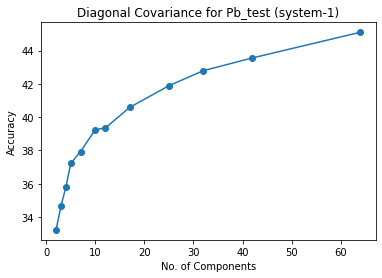

In [ ]:
plt.plot(d_com,prediction_accuracy_pb_test,marker='o')
plt.ylabel('Accuracy')
plt.title('Diagonal Covariance for Pb_test (system-1)')
plt.xlabel('No. of Components')
plt.show()

In [ ]:
d_comf = [2,3,4,5,7,10,12,17,25,32,42]

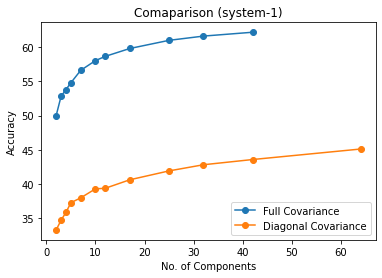

In [ ]:
plt.plot(d_comf,prediction_accuracy_pb_test_f,marker='o',label='Full Covariance')
plt.plot(d_com,prediction_accuracy_pb_test,marker='o',label='Diagonal Covariance')
plt.ylabel('Accuracy')
plt.title('Comaparison (system-1)')
plt.xlabel('No. of Components')
plt.legend()
plt.show()

In [ ]:
num_ds1 = [2, 3, 4, 5, 7, 10, 12, 17]
num_ds2 = [2, 5, 7, 10, 17]

In [ ]:
yt_d = np.array([9.055647180990777,
8.881777009869369,
8.728631639571717,
8.729940574360585,
8.911009886820771,
8.856689093082716,
8.894866357758056,
8.832910111084932])

yt_full = np.array([8.447646971561209,
8.27050446346763,
8.229054861820117,
8.309336195537405,
8.401179786556368])

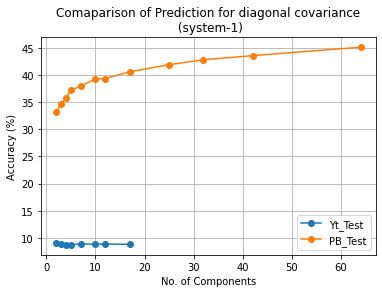

In [ ]:
# plt.plot(q_val_diag,np.array(acc_diag_yt)*100,marker='o',label='YT_Test')
plt.plot(num_ds1,yt_d,marker='o',label='Yt_Test')
plt.plot(d_com,prediction_accuracy_pb_test,marker='o',label='PB_Test')
# plt.plot(q_val,np.array(acc_yt_f)*100,marker='o',label='PB_Test')
plt.ylabel('Accuracy (%)')
plt.title('Comaparison of Prediction for diagonal covariance\n (system-1)')
plt.xlabel('No. of Components')
plt.grid()
plt.legend()
plt.show()

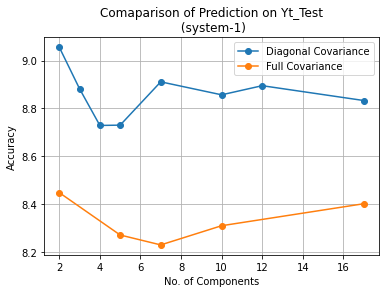

In [ ]:
plt.plot(num_ds1,yt_d,marker='o',label='Diagonal Covariance')
plt.plot(num_ds2,yt_full,marker='o',label='Full Covariance')
plt.ylabel('Accuracy')
plt.title('Comaparison of Prediction on Yt_Test\n (system-1)')
plt.xlabel('No. of Components')
plt.grid()
plt.legend()
plt.show()

In [ ]:
q_val_diag = [4,12,18,24,30,42,64]

In [ ]:
## prediction accuracy using dia
acc_diag_yt = []
for i in range(len(n_components_for_diag_cov)):
    print("Evaluating Model accuracy with Pb_test_df for q = ", n_components_for_diag_cov[i])
    acc_diag_yt.append(prediction(yt_test_df_list,class_specific_gmm_list_diag_cov[i]))
    print("\n")

Evaluating Model accuracy with Pb_test_df for q =  4
Accuracy for each language is: 

asm : 15.898%
tam : 4.992%
odi : 14.218%
tel : 7.807%
hin : 0.601%
mar : 7.312%
ben : 14.979%
mal : 8.310%
guj : 6.120%
eng : 10.537%
kan : 8.460%
pun : 2.261%

Overall Accuracy : 8.429


Evaluating Model accuracy with Pb_test_df for q =  12
Accuracy for each language is: 

asm : 16.997%
tam : 7.623%
odi : 14.119%
tel : 6.773%
hin : 3.082%
mar : 6.637%
ben : 12.890%
mal : 6.945%
guj : 3.995%
eng : 10.955%
kan : 7.080%
pun : 2.625%

Overall Accuracy : 8.283


Evaluating Model accuracy with Pb_test_df for q =  18
Accuracy for each language is: 

asm : 18.548%
tam : 6.910%
odi : 14.236%
tel : 8.403%
hin : 2.962%
mar : 7.119%
ben : 11.947%
mal : 7.112%
guj : 4.387%
eng : 11.218%
kan : 6.530%
pun : 1.963%

Overall Accuracy : 8.443


Evaluating Model accuracy with Pb_test_df for q =  24
Accuracy for each language is: 

asm : 16.814%
tam : 8.465%
odi : 13.494%
tel : 8.049%
hin : 3.031%
mar : 7.360%
ben : 11.

In [ ]:
q_val_diag = [4,12,18,24,30,42,64]

In [ ]:
num_components = [4, 12, 18, 24, 30]


In [ ]:
### prediction accuracy using full covariance matrix
acc_yt_f = []
for i in range(2):
    print("Evaluating Model accuracy with yt_test_df_list for q = ", num_components[i])
    acc_yt_f.append(prediction(yt_test_df_list,class_specific_gmm_list_full_cov[i]))
    print("\n")

Evaluating Model accuracy with yt_test_df_list for q =  4
Accuracy for each language is: 

asm : 19.964%
tam : 5.380%
odi : 7.816%
tel : 6.355%
hin : 0.540%
mar : 9.173%
ben : 15.283%
mal : 5.221%
guj : 0.834%
eng : 8.673%
kan : 5.110%
pun : 1.159%

Overall Accuracy : 7.079


Evaluating Model accuracy with yt_test_df_list for q =  12
Accuracy for each language is: 

asm : 18.752%
tam : 9.830%
odi : 8.788%
tel : 4.712%
hin : 0.725%
mar : 7.172%
ben : 12.077%
mal : 6.976%
guj : 1.348%
eng : 9.410%
kan : 5.932%
pun : 1.021%

Overall Accuracy : 7.181




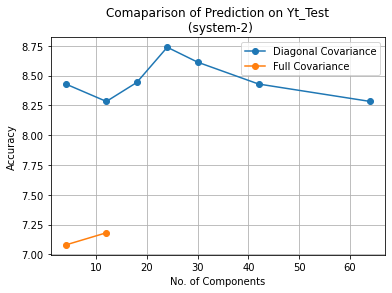

In [ ]:
plt.plot(q_val_diag,np.array(acc_diag_yt)*100,marker='o',label='Diagonal Covariance')
plt.plot(q_val,np.array(acc_yt_f)*100,marker='o',label='Full Covariance')
plt.ylabel('Accuracy')
plt.title('Comaparison of Prediction on Yt_Test\n (system-2)')
plt.xlabel('No. of Components')
plt.grid()
plt.legend()
plt.show()

In [ ]:
## prediction accuracy using dia
acc_full_pb_ubm = []
q_val = [4,12]
for i in range(2):
    print("Evaluating Model accuracy with Pb_test_df for q = ", q_val[i])
    acc_full_pb_ubm.append(prediction(pb_test_df_list,class_specific_gmm_list_full_cov[i]))
    print("\n")

Evaluating Model accuracy with Pb_test_df for q =  4
Accuracy for each language is: 

asm : 34.244%
tam : 46.410%
odi : 45.276%
tel : 18.425%
hin : 19.935%
mar : 49.757%
ben : 64.573%
mal : 36.760%
guj : 60.356%
eng : 44.146%
kan : 44.631%
pun : 40.594%

Overall Accuracy : 41.994


Evaluating Model accuracy with Pb_test_df for q =  12
Accuracy for each language is: 

asm : 37.253%
tam : 49.440%
odi : 47.212%
tel : 26.306%
hin : 29.026%
mar : 51.030%
ben : 66.026%
mal : 40.536%
guj : 59.217%
eng : 44.225%
kan : 47.266%
pun : 44.990%

Overall Accuracy : 45.161


In [ ]:
import matplotlib.pyplot as plt
num_components = [4, 12, 18, 24, 30]
arr = np.array(acc_diag_pb)

Text(0, 0.5, 'No. of Components')

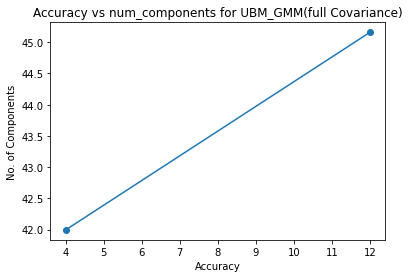

In [ ]:
plt.plot(q_val,np.array(acc_full_pb_ubm)*100,marker='o')
plt.xlabel('Accuracy')
plt.title('Accuracy vs num_components for UBM_GMM(full Covariance)')
plt.ylabel('No. of Components')

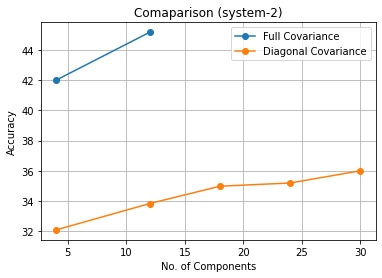

In [ ]:
plt.plot(q_val,np.array(acc_full_pb_ubm)*100,marker='o',label='Full Covariance')
plt.plot(num_components,arr*100,marker='o',label='Diagonal Covariance')
plt.ylabel('Accuracy')
plt.title('Comaparison (system-2)')
plt.xlabel('No. of Components')
plt.grid()
plt.legend()
plt.show()

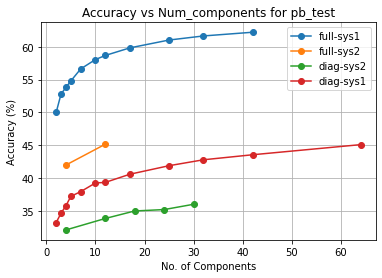

In [ ]:
plt.plot(d_comf,prediction_accuracy_pb_test_f,marker='o',label='full-sys1')
plt.plot(q_val,np.array(acc_full_pb_ubm)*100,marker='o',label='full-sys2')
plt.plot(num_components,arr*100,marker='o',label='diag-sys2')
plt.plot(d_com,prediction_accuracy_pb_test,marker='o',label='diag-sys1')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Num_components for pb_test')
plt.xlabel('No. of Components')
plt.grid()
plt.legend()
plt.show()

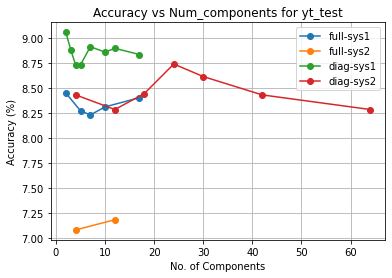

In [ ]:
plt.plot(num_ds2,yt_full,marker='o',label='full-sys1')
plt.plot(q_val,np.array(acc_yt_f)*100,marker='o',label='full-sys2')
plt.plot(num_ds1,yt_d,marker='o',label='diag-sys1')
plt.plot(q_val_diag,np.array(acc_diag_yt)*100,marker='o',label='diag-sys2')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Num_components for yt_test')
plt.xlabel('No. of Components')
plt.grid()
plt.legend()
plt.show()

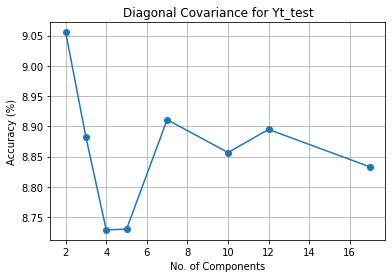

In [ ]:
plt.plot(num_ds1,yt_d,marker='o')
plt.title('Diagonal Covariance for Yt_test')
plt.ylabel('Accuracy (%)')
# plt.title('Accuracy vs Num_components for pb_test')
plt.xlabel('No. of Components')
plt.grid()
# plt.legend()
plt.show()

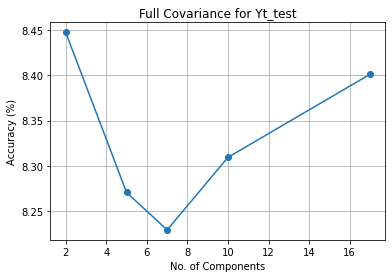

In [ ]:
plt.plot(num_ds2,yt_full,marker='o')
plt.title('Full Covariance for Yt_test')
plt.ylabel('Accuracy (%)')
# plt.title('Accuracy vs Num_components for pb_test')
plt.xlabel('No. of Components')
plt.grid()
# plt.legend()
plt.show()